In [154]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [84]:
from PIL import Image
jpg = Image.open("guk_bw.jpg")

In [85]:
im2arr = np.array(jpg)

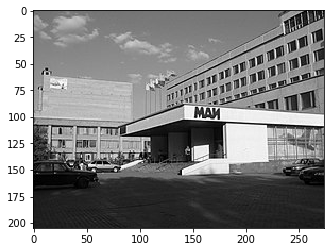

In [86]:
plt.imshow(im2arr, cmap='Greys',  interpolation='nearest')

In [87]:
im2arr.shape

(205, 274, 3)

In [96]:
bw = im2arr[:,:,0]

In [100]:
bw.shape

(205, 274)

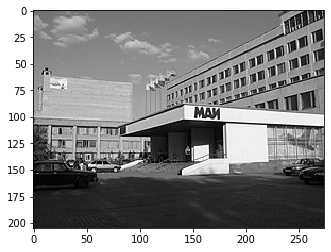

In [99]:
plt.imshow(bw, cmap='gray')

In [173]:
pca = PCA(n_components=0.99)
pca.fit(bw)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [174]:
len(pca.explained_variance_ratio_)

79

In [172]:
sum(pca.explained_variance_ratio_)

0.9070881786802037

In [166]:
X_new09 = pca.transform(bw)

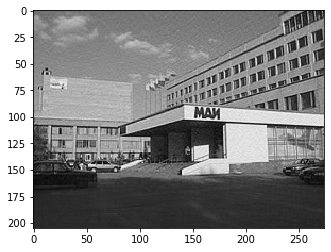

In [167]:
plt.imshow(pca.inverse_transform(X_new09), cmap='gray')

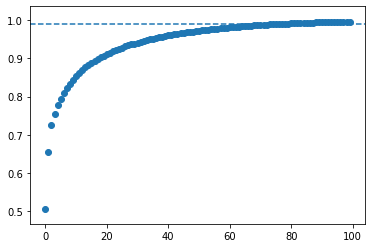

In [147]:
plt.scatter(range(100), np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.99, linestyle='--')

In [304]:
jpg4 = Image.open("two2.jpg")

In [305]:
im2arr4 = np.array(jpg4)

In [306]:
bw4 = im2arr4[:,:,0]

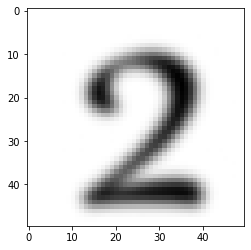

In [307]:
plt.imshow(bw4, cmap='gray')

In [323]:
pca = PCA(n_components=7)
pca.fit(bw4)
sum(pca.explained_variance_ratio_)

0.9989017440615398

In [324]:
X_new4back = pca.transform(bw4)

In [326]:
X_new4back

array([[-3.36579641e+02,  9.00985480e+01, -4.41149206e+01,
        -2.61131902e+00, -1.97146131e+01,  1.46143999e+00,
         8.23059710e+00],
       [-3.36579641e+02,  9.00985480e+01, -4.41149206e+01,
        -2.61131902e+00, -1.97146131e+01,  1.46143999e+00,
         8.23059710e+00],
       [-3.36579641e+02,  9.00985480e+01, -4.41149206e+01,
        -2.61131902e+00, -1.97146131e+01,  1.46143999e+00,
         8.23059710e+00],
       [-3.36579641e+02,  9.00985480e+01, -4.41149206e+01,
        -2.61131902e+00, -1.97146131e+01,  1.46143999e+00,
         8.23059710e+00],
       [-3.36579641e+02,  9.00985480e+01, -4.41149206e+01,
        -2.61131902e+00, -1.97146131e+01,  1.46143999e+00,
         8.23059710e+00],
       [-3.36579641e+02,  9.00985480e+01, -4.41149206e+01,
        -2.61131902e+00, -1.97146131e+01,  1.46143999e+00,
         8.23059710e+00],
       [-3.35846811e+02,  8.83072211e+01, -4.39806785e+01,
        -3.54032099e+00, -1.97493520e+01,  1.34777044e+00,
         8.6563014

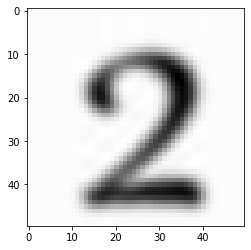

In [325]:
plt.imshow(pca.inverse_transform(X_new4back), cmap='gray')

In [190]:
np.set_printoptions(precision=3, suppress=True)

In [89]:
aa = [[4,3,0,0,5,0],[5,0,4,0,4,0],[4,0,5,3,4,0],[0,3,0,0,0,5],[0,4,0,0,0,4],[0,0,2,4,0,5]]

In [148]:
aa = [[4,3,np.nan,np.nan,5,np.nan],[5,np.nan,4,np.nan,4,np.nan],[4,np.nan,5,3,4,np.nan],
      [np.nan,3,np.nan,np.nan,np.nan,5],[np.nan,4,np.nan,np.nan,np.nan,4],[np.nan,np.nan,2,4,np.nan,5]]

https://medium.datadriveninvestor.com/how-funk-singular-value-decomposition-algorithm-work-in-recommendation-engines-36f2fbf62cac

In [228]:
aa = [[np.nan,np.nan,9,1],[3,np.nan,7,np.nan],[5,np.nan,np.nan,10],[np.nan,2,np.nan,np.nan]]

In [229]:
aa = np.array(aa)

In [230]:
aa

array([[nan, nan,  9.,  1.],
       [ 3., nan,  7., nan],
       [ 5., nan, nan, 10.],
       [nan,  2., nan, nan]])

In [231]:
from sklearn.impute import SimpleImputer

In [244]:
si = SimpleImputer(strategy = "mean")#, fill_value=0)
tr = si.fit_transform(aa)

In [245]:
aa_m = tr-tr.mean(axis=0)
U, s, Vt = np.linalg.svd(aa_m)
s = np.diag(s)
V = np.dot(s,Vt)

In [246]:
U

array([[ 0.707, -0.408,  0.577,  0.   ],
       [-0.   ,  0.816,  0.577,  0.   ],
       [-0.707, -0.408,  0.577,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  1.   ]])

In [200]:
k = 3
Vd = V[:,:k]
Svd = np.dot(U,Vd)

https://medium.datadriveninvestor.com/how-funk-singular-value-decomposition-algorithm-work-in-recommendation-engines-36f2fbf62cac
https://towardsdatascience.com/beginners-guide-to-creating-an-svd-recommender-system-1fd7326d1f65

Как-то корявенько, то что в статье. Есть же SimpleImputer...

In [184]:
def svd(train, k):
    utilMat = np.array(train)
    # the nan or unavailable entries are masked
    mask = np.isnan(utilMat)
    masked_arr = np.ma.masked_array(utilMat, mask)
    item_means = np.mean(masked_arr, axis=0)
    # nan entries will replaced by the average rating for each item
    utilMat = masked_arr.filled(item_means)
    print(utilMat)
    x = np.tile(item_means, (utilMat.shape[0],1))
    # we remove the per item average from all entries.
    # the above mentioned nan entries will be essentially zero now
    utilMat = utilMat - x
    # The magic happens here. U and V are user and item features
    U, s, V=np.linalg.svd(utilMat, full_matrices=False)
    s=np.diag(s)
    # we take only the k most significant features
    s=s[0:k,0:k]
    U=U[:,0:k]
    V=V[0:k,:]
    s_root=np.sqrt(s)
    Usk=np.dot(U,s_root)
    skV=np.dot(s_root,V)
    UsV = np.dot(Usk, skV)
    UsV = UsV + x
    print("svd done")
    return UsV

In [185]:
np.sqrt([4,9])

array([2., 3.])

In [186]:
svd(aa,2)

[[4.    3.    3.667 3.5   5.    4.667]
 [5.    3.333 4.    3.5   4.    4.667]
 [4.    3.333 5.    3.    4.    4.667]
 [4.333 3.    3.667 3.5   4.333 5.   ]
 [4.333 4.    3.667 3.5   4.333 4.   ]
 [4.333 3.333 2.    4.    4.333 5.   ]]
svd done


masked_array(
  data=[[4.121539908620888, 2.938163686949588, 3.6520945640764078,
         3.483361412963377, 4.546818004621216, 4.979018615738223],
        [4.441483367420548, 3.564966633420765, 3.937325906562234,
         3.4248392203923532, 4.177403188769141, 4.452829598521195],
        [4.207271924702022, 3.2550775472752314, 5.042278237864532,
         3.0501372983608306, 4.213663847797858, 4.566814111532744],
        [4.18835361175248, 3.0628843136624595, 3.6572021686972565,
         3.488448047784831, 4.47937976043512, 4.880376673986521],
        [4.623292776495038, 3.874231372675081, 3.6855956626054867,
         3.5231039044303376, 4.041240479129758, 4.239246652026958],
        [4.418058411009021, 3.3046764460168756, 2.025503460194081,
         4.03011011606827, 4.541494719246905, 4.881714348194361]],
  mask=[[False, False, False, False, False, False],
        [False, False, False, False, False, False],
        [False, False, False, False, False, False],
        [False, False, Fa

In [90]:
aa = np.array(aa)

In [135]:
aa_m = aa-aa.mean(axis=0)
U, s, Vt = np.linalg.svd(aa_m)

In [136]:
s = np.diag(s)

In [163]:
np.set_printoptions(precision=3, suppress=True)

In [138]:
aa_m

array([[ 1.833,  1.333, -1.833, -1.167,  2.833, -2.333],
       [ 2.833, -1.667,  2.167, -1.167,  1.833, -2.333],
       [ 1.833, -1.667,  3.167,  1.833,  1.833, -2.333],
       [-2.167,  1.333, -1.833, -1.167, -2.167,  2.667],
       [-2.167,  2.333, -1.833, -1.167, -2.167,  1.667],
       [-2.167, -1.667,  0.167,  2.833, -2.167,  2.667]])

In [139]:
V = np.dot(s,Vt)

In [140]:
aa_re=np.dot(U,V)

In [141]:
aa_re

array([[ 1.833,  1.333, -1.833, -1.167,  2.833, -2.333],
       [ 2.833, -1.667,  2.167, -1.167,  1.833, -2.333],
       [ 1.833, -1.667,  3.167,  1.833,  1.833, -2.333],
       [-2.167,  1.333, -1.833, -1.167, -2.167,  2.667],
       [-2.167,  2.333, -1.833, -1.167, -2.167,  1.667],
       [-2.167, -1.667,  0.167,  2.833, -2.167,  2.667]])

In [142]:
np.dot(U[0],V[:,3])

-1.1666666666666674

In [143]:
np.dot(U[0],V[:,4])

2.833333333333332

In [144]:
np.dot(U,V)

array([[ 1.833,  1.333, -1.833, -1.167,  2.833, -2.333],
       [ 2.833, -1.667,  2.167, -1.167,  1.833, -2.333],
       [ 1.833, -1.667,  3.167,  1.833,  1.833, -2.333],
       [-2.167,  1.333, -1.833, -1.167, -2.167,  2.667],
       [-2.167,  2.333, -1.833, -1.167, -2.167,  1.667],
       [-2.167, -1.667,  0.167,  2.833, -2.167,  2.667]])